# Newton's Method for Nonlinear Boundary Value Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Forward gaussian elimination
def forward_elimination(A,b):
    n =  np.shape(A)[0]
    for k in range(0,n-1):
        for i in range(k+1,n):
            m = A[i,k]/A[k,k]
            for j in range(k,n):
                #print(i, j, A[i,j], A[k,j])
                A[i,j] = A[i,j] - m*A[k,j]
            b[i] = b[i] - m*b[k]
    #print(A,b)
    return A, b     

In [3]:
# Back substitution to solve a linear system with an upper diagonal matrix.
def back_substitution(A,b):
    n = np.shape(A)[0]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in range(n-2,-1,-1):
        #print(i)
        _sum = 0
        for j in range(n-1,i,-1):
            #print("j:", j)
            _sum += A[i,j] * x[j]
        x[i] = (b[i] - _sum) / A[i,i]
    
    #print(x)
    return x

In [4]:
# Nonlinear function G
def G(x, h, alpha = 0.7, beta = 0.7):
    n = np.shape(x)[0]
    G = np.zeros(n)
    G[0] = (alpha - 2 * x[0] + x[1])/h**2 + np.sin(x[0])
    G[n-1] = (x[n-2] - 2 * x[n-1] + beta)/h**2 + np.sin(x[n-1])
    
    for i in range(1,n-1):
        G[i] = (x[i-1] - 2 * x[i] + x[i+1])/h**2 + np.sin(x[i])
    
    return G

In [5]:
# Derivative of the nonlinear function G
def DG(x,h):
    n = np.shape(x)[0]
    dG = np.zeros((n,n))
    
    dG[0,0] = np.cos(x[0]) - 2 / h**2
    dG[0,1] = 1/h**2
    
    dG[n-1,n-2] = 1/h**2
    dG[n-1,n-1] = np.cos(x[n-1]) - 2 / h**2
    
    for i in range(1,n-1):
        dG[i,i-1] = 1/h**2
        dG[i,i] = np.cos(x[i]) - 2 / h**2
        dG[i,i+1] = 1/h**2
    
    return dG

In [6]:
# Newton's method
def newton(guess, h, _iterations = 10):
    history = []
    E = []
    #G_history = []
    history.append(np.copy(guess))
    #G_history.append(G(np.copy(guess),h))
    _theta = np.copy(guess)
    _G = G(_theta, h)
    dG = DG(_theta, h)
    history.append(_theta)
    #G_history.append(G(_theta,h))
    
    while (np.linalg.norm(_G) > h**3):
        old_theta = np.copy(_theta)
        A, b  = forward_elimination(dG, _G)
        step = back_substitution(A, b)
        #print(step)
        _theta -= step
        _G = G(_theta, h)
        dG = DG(_theta,h)
        history.append(np.copy(_theta))
        #G_history.append(G(_theta,h))
        E.append(np.linalg.norm(old_theta - _theta))
        #i+=1
    
    return _theta, _G, history, E

|theta_{k+1} - thet_{k}|: [11.296411115108345, 3.0676970218169473, 0.4255204743600309, 0.0033126569951874314]


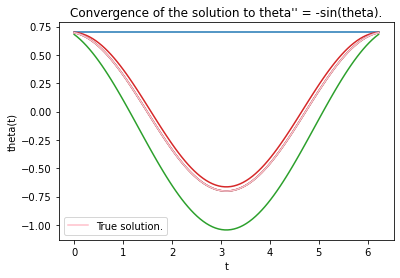

In [14]:
iterations = 10
n=100
h=2*np.pi/n
guess1 = 0.7*np.ones(n)
theta1, G1, history1, E1 =  newton(guess1, h, iterations)
# quadratic convergence
print("|theta_{k+1} - thet_{k}|:", E1)

for i in range(6):
    plt.plot([2*np.pi*i/n for i in range(n)], history1[i])
plt.plot([2*np.pi*i/n for i in range(n)], history1[5], color = "pink", label = "True solution.")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.title("Convergence of the solution to theta'' = -sin(theta).")
plt.legend()
plt.savefig("p2_part1_plot.png")
plt.show()


|theta_{k+1} - thet_{k}|: [11.296411115108345, 3.0676970218169473, 0.4255204743600309, 0.0033126569951874314]


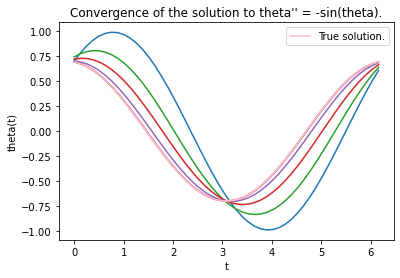

In [15]:
n = 50
h = 2*np.pi/n
guess2 = np.zeros(n)
for i in range(n):
    guess2[i] = 0.7*(np.sin(i*h) + np.cos(i*h))

theta2, G2, history2, E2 = newton(guess2,h)
# quadratic convergence
print("|theta_{k+1} - thet_{k}|:", E1)

for i in range(7):
    plt.plot([2*np.pi*i/n for i in range(n)], history2[i])
plt.plot([2*np.pi*i/n for i in range(n)], history2[6], color = "pink", label = "True solution.")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.title("Convergence of the solution to theta'' = -sin(theta).")
plt.legend()
plt.savefig("p2_part2_plot.png")
plt.show()